## Cálculo del NDVI sobre el Embalse Los Molinos usando datos LandSAT 8

##### **Instalamos e importamos las librerías a utilizar**

Instalamos solo en caso sea necesario. Para ello descomentamos cada línea. Procurar comentarlas nuevamente para evitar su ejecución repetitiva.

In [1]:
# !pip install rasterio
# !pip install numpy
# !pip install matplotlib

Definimos las librerías a usar
- *rasterio* para la lectura de la imagen
- *numpy* para operciones matemáticas
- *matplotlib* para los gráficos
- *zipfile* para descomprimir los datos LandSAT8
- *os* para trabajar con lso directorios y archivos

In [2]:
# Importamos las librerías necesarias
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

##### **Definición de directorio de trabajo y datos a procesar**
Podemos editar el nombre de nuestro directorio de trabajo (previamente creado). Asimismo, el código ubica los datos (*.zip*) para descomprimirlos y guardarlos en el mismo directorio de trabajo definido. Puedes fijarte en el *print* si se ubicó y descomprimieron tus datos.

In [3]:
# Descomprimimos la imagen satelital de .zip a .tif

# Definimos el directorio de trabajo.
work_dir = './los_molinos_L8_2023/'

# Buscamos la imagen satelital, la cual sera el archivo con la extension .zip
for file in os.listdir(work_dir):
    if file.endswith('.zip'):
        archivo_zip = file
        ruta_zip = work_dir + archivo_zip

# Verificamos que se haya encontrado el archivo .zip
if not archivo_zip:
    print('No se encontró el archivo .zip')
else:
    print(f'Archivo .zip encontrado: {archivo_zip}')

# Definimos la Ruta de extracción del archivo .zip
ruta_extraccion = work_dir

# Extraemos las bandas del archivo .zip
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_extraccion)

# Listamos los archivos extraidos
archivos_extraidos = os.listdir(ruta_extraccion)
print('Archivos extraidos:')
for archivo in archivos_extraidos:
    print(archivo)

Archivo .zip encontrado: Los-Molinos_2024-02-10_0_all_bands.zip
Archivos extraidos:
2024-02-10.QA_PIXEL.tif
2024-02-10.SR_B1.tif
2024-02-10.SR_B2.tif
2024-02-10.SR_B3.tif
2024-02-10.SR_B4.tif
2024-02-10.SR_B5.tif
2024-02-10.SR_B6.tif
2024-02-10.SR_B7.tif
2024-02-10.ST_B10.tif
Los-Molinos_2024-02-10_0_all_bands.zip


##### **Definimos la ubicacion de las bandas NIR y RED de la imagen satelital.**

En la directorio de trabajo previamente definido buscamos los archivos *.tif* con el termino 'B5' y 'B4' y las definimos automaticamente como las bandas NIR y RED.

In [4]:
# Ubicamos automaticamente las bandas NIR y RED. Esto solo en caso de usar LandSAT8.
nir = [ruta_extraccion + i for i in os.listdir(ruta_extraccion) if 'B5' in i][0]
red = [ruta_extraccion + i for i in os.listdir(ruta_extraccion) if 'B4' in i][0]

# En caso de usar otra imagen satelital, se debe definir manualmente la ruta de las
# bandas NIR y RED. Por ejemplo:
# nir = './ruta_de_la_banda_nir.tif'
# red = './ruta_de_la_banda_red.tif'

##### **Realizamos un analisis exploratorio de las bandas NIR y RED para el NDVI**

Abrimos las bandas NIR y RED con *rasterio* y realizamos un analisis exploratorio de los metadatos. Verificamos el *print* con las características de las bandas. 

In [5]:
# Abrimos las bandas NIR y RED con rasterio y realizamos un analisis exploratorio de
# los metadatos.

with rasterio.open(nir) as src:
    nir_src = src.read(1).astype(np.float32)
    print("------------------------------------------------------")
    print('Metadatos de la Banda NIR:')
    print("Tamaño de la imagen: ", src.width, "x", src.height)
    print("Número de bandas: ", src.count)
    print("Coordenadas de la esquina superior izquierda: ", src.transform * (0, 0))
    print("Resolución espacial: ", src.res)
    print("Sistema de referencia de coordenadas: ", src.crs)
    print("Valor de NoData: ", src.nodata)
    print("Tipo de dato: ", src.dtypes[0])
    print("Rango de valores: ", np.nanmin(src.read(1)), "-", np.nanmax(src.read(1)))
    print("------------------------------------------------------")

with rasterio.open(red) as src:
    red_src = src.read(1).astype(np.float32)
    print('Metadatos de la Banda RED:')
    print("Tamaño de la imagen: ", src.width, "x", src.height)
    print("Número de bandas: ", src.count)
    print("Coordenadas de la esquina superior izquierda: ", src.transform * (0, 0))
    print("Resolución espacial: ", src.res)
    print("Sistema de referencia de coordenadas: ", src.crs)
    print("Valor de NoData: ", src.nodata)
    print("Tipo de dato: ", src.dtypes[0])
    print("Rango de valores: ", np.nanmin(src.read(1)), "-", np.nanmax(src.read(1)))
    print("------------------------------------------------------")

------------------------------------------------------
Metadatos de la Banda NIR:
Tamaño de la imagen:  298 x 406
Número de bandas:  1
Coordenadas de la esquina superior izquierda:  (350325.0, -3516975.0)
Resolución espacial:  (30.0, 30.0)
Sistema de referencia de coordenadas:  EPSG:32620
Valor de NoData:  0.0
Tipo de dato:  uint16
Rango de valores:  6035 - 32560
------------------------------------------------------
Metadatos de la Banda RED:
Tamaño de la imagen:  298 x 406
Número de bandas:  1
Coordenadas de la esquina superior izquierda:  (350325.0, -3516975.0)
Resolución espacial:  (30.0, 30.0)
Sistema de referencia de coordenadas:  EPSG:32620
Valor de NoData:  0.0
Tipo de dato:  uint16
Rango de valores:  4210 - 29001
------------------------------------------------------


Visualizamos las Bandas NIR y RED.

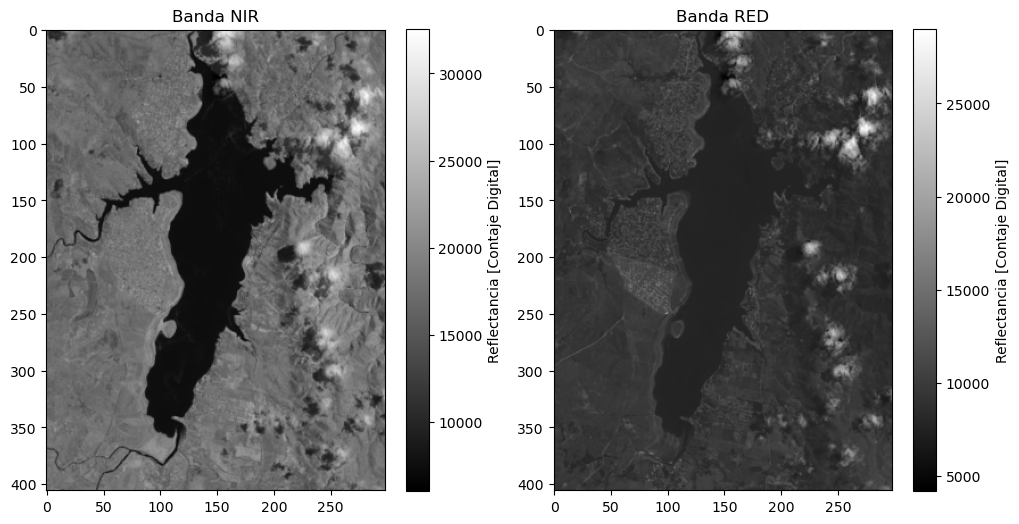

In [6]:
# Visualizamos las bandas NIR y RED
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(nir_src, cmap='gray')
axs[0].set_title('Banda NIR')
axs[1].imshow(red_src, cmap='gray')
axs[1].set_title('Banda RED')
plt.colorbar(axs[0].imshow(nir_src, cmap='gray'),
             ax=axs[0], orientation='vertical',
             label='Reflectancia [Contaje Digital]')
plt.colorbar(axs[1].imshow(red_src, cmap='gray'),
             ax=axs[1], orientation='vertical',
             label='Reflectancia [Contaje Digital]')
plt.show()

Estimamos los niveles de significancia (inferior y superior) para un alfa = 0.05 para las bandas NIR y RED. Estos umbrales nos permitirán identificar los valores atípicos en las bandas NIR y RED. Asimismo, realizamos un hstograma para ver los resultados.

------------------------------------------------------
Niveles de significancia para la Banda NIR:
Percentil 2.5:  7433.0
Percentil 97.5:  21631.324999999997
------------------------------------------------------
Niveles de significancia para la Banda RED:
Percentil 2.5:  7586.0
Percentil 97.5:  13304.0
------------------------------------------------------


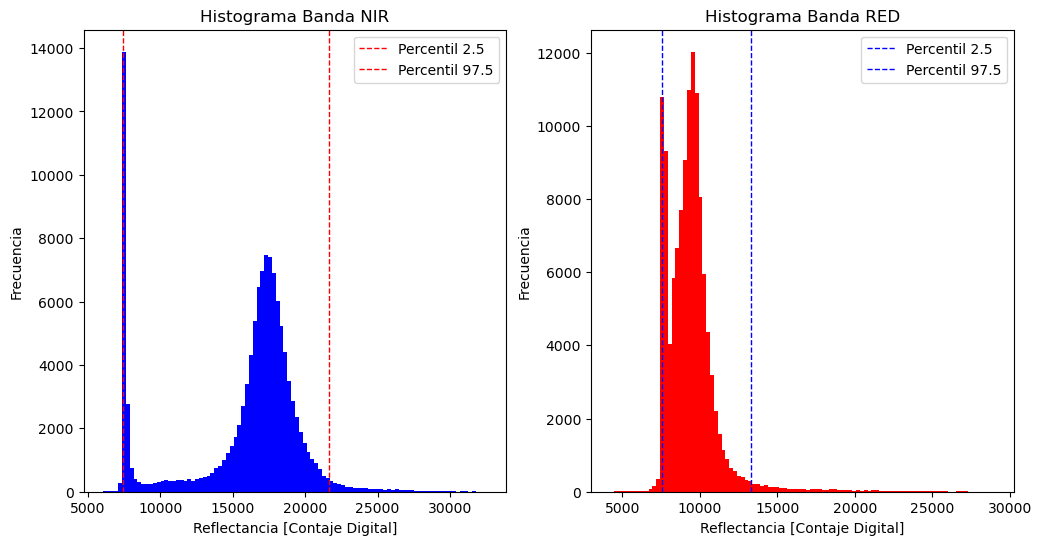

In [7]:
# Definimos los valores de los percentiles 2.5 y 97.5 para las bandas NIR y RED
nir_percentiles = np.percentile(nir_src, [2.5, 97.5])
red_percentiles = np.percentile(red_src, [2.5, 97.5])

# Visualizamos los valores de los percentiles 2.5 y 97.5 para las bandas NIR y RED
print("------------------------------------------------------")
print("Niveles de significancia para la Banda NIR:")
print("Percentil 2.5: ", nir_percentiles[0])
print("Percentil 97.5: ", nir_percentiles[1])
print("------------------------------------------------------")
print("Niveles de significancia para la Banda RED:")
print("Percentil 2.5: ", red_percentiles[0])
print("Percentil 97.5: ", red_percentiles[1])
print("------------------------------------------------------")

# Graficamos el histograma de las bandas NIR y RED antes con los umbrales de significancia
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(nir_src.flatten(), bins=100, color='b')
axs[0].axvline(nir_percentiles[0], color='r', linestyle='dashed', linewidth=1)
axs[0].axvline(nir_percentiles[1], color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Histograma Banda NIR')
axs[0].set_xlabel('Reflectancia [Contaje Digital]')
axs[0].set_ylabel('Frecuencia')
axs[0].legend(['Percentil 2.5', 'Percentil 97.5'])
axs[1].hist(red_src.flatten(), bins=100, color='r')
axs[1].axvline(red_percentiles[0], color='b', linestyle='dashed', linewidth=1)
axs[1].axvline(red_percentiles[1], color='b', linestyle='dashed', linewidth=1)
axs[1].set_title('Histograma Banda RED')
axs[1].set_xlabel('Reflectancia [Contaje Digital]')
axs[1].set_ylabel('Frecuencia')
axs[1].legend(['Percentil 2.5', 'Percentil 97.5'])
plt.show()

Con esta celda podemos enmascarar los valores atípicos en las bandas NIR y RED, reemplazándolos por NaN y los guardarlos en una nueva variable. **(Solo en caso el usuario lo considere necesario)**.

In [ ]:
# nir_src_masked = np.where((nir_src < nir_percentiles[0]) | (nir_src > nir_percentiles[1]),
#                          np.nan, nir_src)
# red_src_masked = np.where((red_src < red_percentiles[0]) | (red_src > red_percentiles[1]),
#                          np.nan, red_src)

##### **Calculamos el NDVI**
En esta parte podemos estimar el Indice NDVI sobre las bandas ya definidas, estas pueden tener valores atípicos enmascarados, **en caso el usuario lo considere necesario**. Asimismo, graficamos un histograma para visualizar la distribución de los resultados.

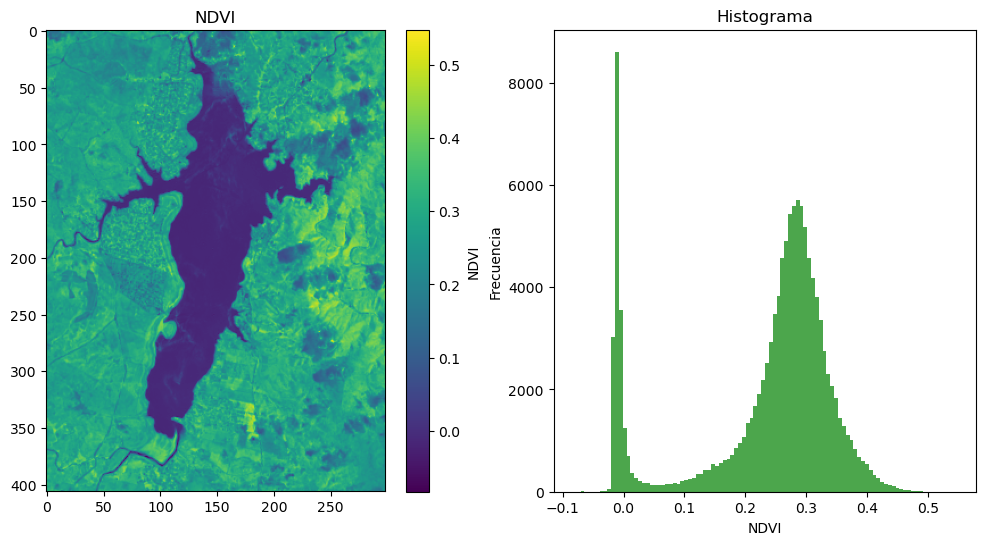

In [8]:
# Calculamos el NDVI y su respectivo histograma en el mismo grafico
ndvi = (nir_src - red_src) / (nir_src + red_src)

# En caso deseemos trabajar con las imagenes con los outliers enmascarados, estimamos
# el NDVI con la siguiente expresion
# ndvi = (nir_src_masked - red_src_masked) / (nir_src_masked + red_src_masked)

# Hacemos la grafica del NDVI y su histograma
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(ndvi, cmap='viridis')
axs[0].set_title('NDVI')
plt.colorbar(axs[0].imshow(ndvi, cmap='viridis'),
             ax=axs[0], orientation='vertical',
             label='NDVI')
axs[1].hist(ndvi.ravel(), bins=100, color='g', alpha=0.7)
axs[1].set_title('Histograma')
axs[1].set_xlabel('NDVI')
axs[1].set_ylabel('Frecuencia')
plt.show()

Podemos exportar el Indice de toda la imagen en caso sea necesario.

In [ ]:
# Guardamos el NDVI en un archivo .tif
#ndvi_path = work_dir + 'ndvi.tif'
#with rasterio.open(nir) as src:
#    profile = src.profile
#    profile.update(dtype=rasterio.float32)
#    profile.update(count=1)
#    profile.update(nodata=None)
#    with rasterio.open(ndvi_path, 'w', **profile) as dst:
#        dst.write(ndvi.astype(rasterio.float32), 1)

##### **Cálculo de Máscara para el Embalse Los Molinos**
Ahora procederemos a crear una máscara binaria para identificar las zonas con agua y luego, con ella, extraer estas zonas de la imagen NDVI previamnete estimada. Para ello, estimaremos el **Índice de Agua Normalizado Modificado (MNDWI)** y aplicamos un umbral para identificar las zonas con agua.


Para ello, utilizamos la misma metodología de lectura de las bandas GREEN y SWIR e identificación de valores atípicos que usamos previamente en el NDVI.

En la directorio de trabajo previamente definido buscamos los archivos *.tif* con el termino 'B3' y 'B6' y las definimos automaticamente como las bandas GREEN y SWIR.

In [9]:
# Definimos la Ruta de las bandas GREEN y SWIR de la imagen satelital. Solo en caso
# de usar datos LandSAT 8.
green = [ruta_extraccion + i for i in os.listdir(ruta_extraccion) if 'B3' in i][0]
swir = [ruta_extraccion + i for i in os.listdir(ruta_extraccion) if 'B6' in i][0]

# En caso de usar otra imagen satelital, se debe definir manualmente la ruta de las
# bandas GREEN y SWIR. Por ejemplo:
# green = './ruta_de_la_banda_green.tif'
# swir = './ruta_de_la_banda_swir.tif'

# Abrimos las bandas GREEN y SWIR con rasterio
with rasterio.open(swir) as src:
    swir_src = src.read(1).astype(np.float32)

with rasterio.open(green) as src:
    green_src = src.read(1).astype(np.float32)

Estimamos los niveles de significancia (inferior y superior) para un alfa = 0.05 para las bandas GREEN y SWIR. Estos umbrales nos permitirán identificar los valores atípicos en las bandas GREEN y SWIR. Asismismo, graficamos sus histogramas para visualizar los resultados.

------------------------------------------------------
Niveles de significancia para la Banda GREEN:
Percentil 2.5:  7886.0
Percentil 97.5:  13088.324999999997
------------------------------------------------------
Niveles de significancia para la Banda SWIR:
Percentil 2.5:  7328.0
Percentil 97.5:  19543.649999999994
------------------------------------------------------


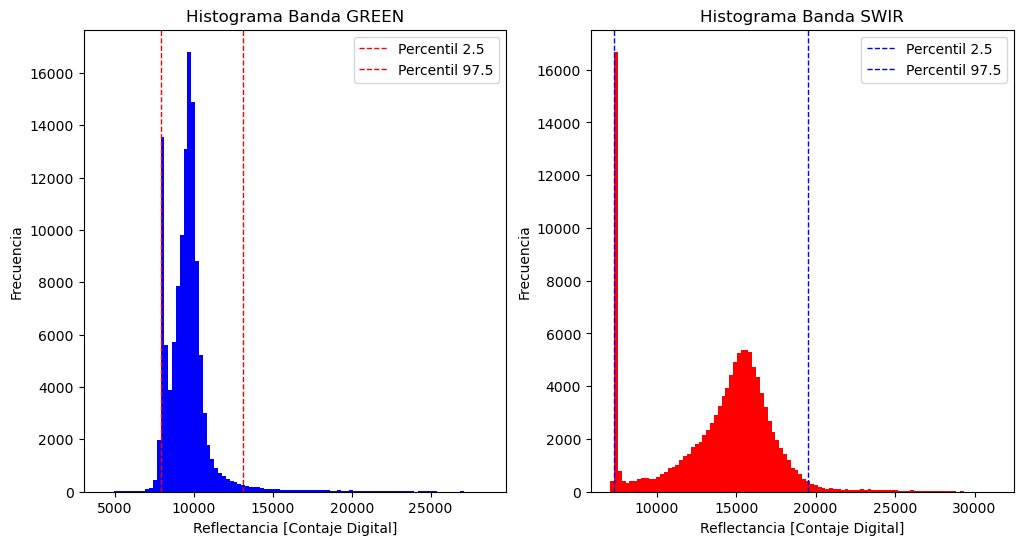

In [10]:
# Definimos los valores de los percentiles 2.5 y 97.5 para las bandas GREEN y SWIR
green_percentiles = np.percentile(green_src, [2.5, 97.5])
swir_percentiles = np.percentile(swir_src, [2.5, 97.5])

# Visualizamos los valores de los percentiles 2.5 y 97.5 para las bandas GREEN y SWIR
print("------------------------------------------------------")
print("Niveles de significancia para la Banda GREEN:")
print("Percentil 2.5: ", green_percentiles[0])
print("Percentil 97.5: ", green_percentiles[1])
print("------------------------------------------------------")
print("Niveles de significancia para la Banda SWIR:")
print("Percentil 2.5: ", swir_percentiles[0])
print("Percentil 97.5: ", swir_percentiles[1])
print("------------------------------------------------------")

# Graficamos el histograma de las bandas GREEN y SWIR antes con los umbrales de significancia
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(green_src.flatten(), bins=100, color='b')
axs[0].axvline(green_percentiles[0], color='r', linestyle='dashed', linewidth=1)
axs[0].axvline(green_percentiles[1], color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Histograma Banda GREEN')
axs[0].set_xlabel('Reflectancia [Contaje Digital]')
axs[0].set_ylabel('Frecuencia')
axs[0].legend(['Percentil 2.5', 'Percentil 97.5'])
axs[1].hist(swir_src.flatten(), bins=100, color='r')
axs[1].axvline(swir_percentiles[0], color='b', linestyle='dashed', linewidth=1)
axs[1].axvline(swir_percentiles[1], color='b', linestyle='dashed', linewidth=1)
axs[1].set_title('Histograma Banda SWIR')
axs[1].set_xlabel('Reflectancia [Contaje Digital]')
axs[1].set_ylabel('Frecuencia')
axs[1].legend(['Percentil 2.5', 'Percentil 97.5'])
plt.show()

Con esta celda podemos enmascarar los valores atípicos en las bandas GREEN y SWIR, reemplazándolos por NaN y los guardarlos en una nueva variable. **(Solo en caso el usuario lo considere necesario)**.

In [ ]:
# Enmascaramos los valores atípicos en las bandas GREEN y SWIR, los reemplazamos por NaN
# y los guardamos en una nueva variable.
# green_src_masked = np.where((green_src < green_percentiles[0]) | (green_src > green_percentiles[1]),
#                          np.nan, green_src)
# swir_src_masked = np.where((swir_src < swir_percentiles[0]) | (swir_src > swir_percentiles[1]),
#                          np.nan, swir_src)

Ahora **calculamos el MNDWI** con las bandas GREEN y SWIR previamente definidas, estas pueden tener valores atípicos enmascarados, **en caso el usuario lo considere necesario**. Asimismo, graficamos un histograma para visualizar la distribución de los resultados.

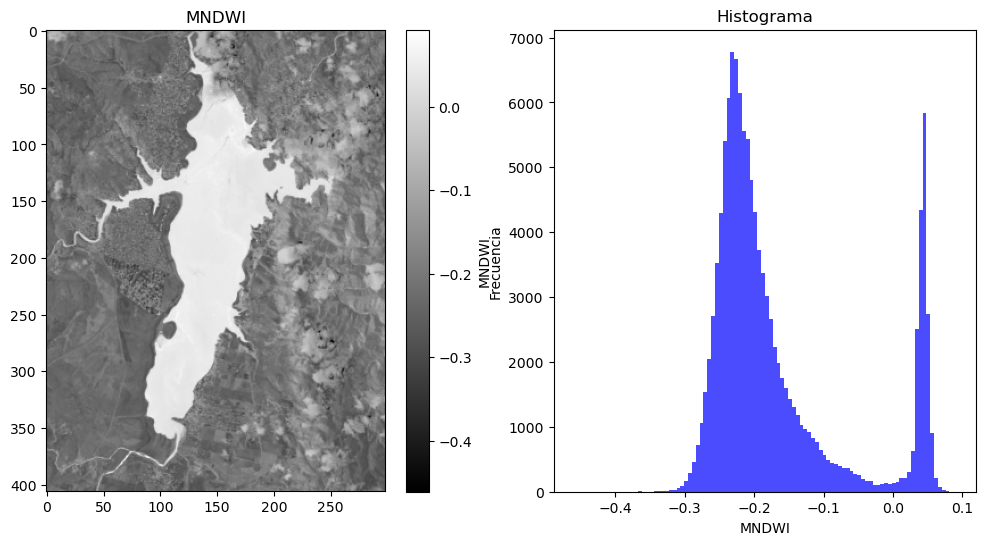

In [11]:
# Calculamos el MNDWI y su respectivo histograma en el mismo grafico
mndwi = (green_src - swir_src) / (green_src + swir_src)

# En caso deseemos trabajar con las imagenes con los outliers enmascarados, estimamos
# el MNDWI con la siguiente expresion
# mndwi = (green_src_masked - swir_src_masked) / (green_src_masked + swir_src_masked)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(mndwi, cmap='gray')
axs[0].set_title('MNDWI')
axs[1].hist(mndwi.ravel(), bins=100, color='b', alpha=0.7)
axs[1].set_title('Histograma')
axs[1].set_xlabel('MNDWI')
axs[1].set_ylabel('Frecuencia')
plt.colorbar(axs[0].imshow(mndwi, cmap='gray'),
             ax=axs[0], orientation='vertical',
             label='MNDWI')
plt.show()

Ahora **aplicamos un umbral y creamos la máscara** para identificar las zonas con agua. En este caso, utilizamos un umbral de 0, pero este valor puede ser modificado a criterio.

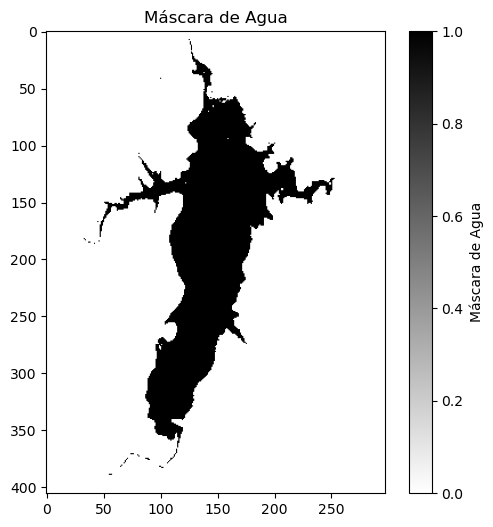

In [12]:
# Definimos el umbral y creamos la mascara binaria para el agua
umbral_agua = 0
mascara_agua = mndwi > umbral_agua

# Visualizamos la mascara binaria
plt.figure(figsize=(6, 6))
plt.imshow(mascara_agua, cmap='gray_r')
plt.title('Máscara de Agua')
plt.colorbar(plt.imshow(mascara_agua, cmap='gray_r'),
             orientation='vertical', label='Máscara de Agua')
plt.show()

Podemos exportar el Indice de toda la imagen **en caso sea necesario**.

In [ ]:
# Guardamos la mascara binaria en un archivo .tif en el directorio de trabajo. Los valores
# de cero se guardarán como nodata.
#mascara_path = work_dir + 'mascara_agua.tif'
#with rasterio.open(nir) as src:
#    profile = src.profile
#    profile.update(dtype=rasterio.uint8)
#    profile.update(count=1)
#    profile.update(nodata=0)
#    with rasterio.open(mascara_path, 'w', **profile) as dst:
#        dst.write(mascara_lago.astype(rasterio.uint8) * 255, 1)

##### **Recortamos los resultados del NDVI en el Embalse Los Molinos**
Utilizando la máscara binaria previamente estimada, recortaremos el NDVI ya estimado, ello con el fin de obtener los valores del indice solamente en nuestra área de interés. Asimismo, realzamos los resultados del indice y realizamos el histograma para ver la distribución de los resultados.

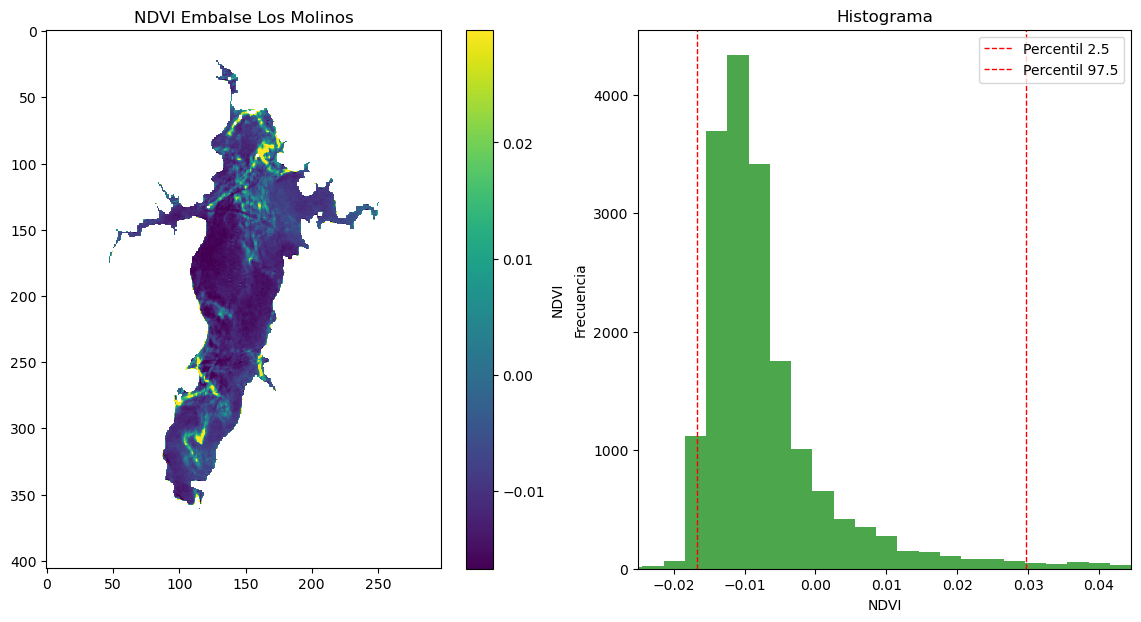

In [13]:
# Ahora, con esta mascara binaria, cortamos la imagen NDVI para mostrar solo los
# pixeles correspondientes a las zonas con agua.

mascara_emb = mascara_agua.astype(bool)
ndvi_emb = ndvi.copy()
ndvi_emb[~mascara_emb] = np.nan

# Estimamos los niveles de significancia (inferior y superior) para un alfa = 0.05 para el
# NDVI estimado. Estos umbrales nos permitirán realzar la imagen.

# Definimos los valores de los percentiles 2.5 y 97.5
ndvi_emb_percentiles = np.percentile(ndvi_emb[~np.isnan(ndvi_emb)], [2.5, 97.5])

# Graficamos el NDVI en el lago ajustando los colores a los umbrales de significancia
# y su histograma con los umbrales de significancia como lineas verticales.
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
im = axs[0].imshow(ndvi_emb, cmap='viridis', vmin=ndvi_emb_percentiles[0],
                     vmax=ndvi_emb_percentiles[1])
axs[0].set_title('NDVI Embalse Los Molinos')
plt.colorbar(im, ax=axs[0], orientation='vertical', label='NDVI')
axs[1].hist(ndvi_emb.ravel(), bins=100, color='g', alpha=0.7)
axs[1].axvline(ndvi_emb_percentiles[0], color='r', linestyle='dashed', linewidth=1)
axs[1].axvline(ndvi_emb_percentiles[1], color='r', linestyle='dashed', linewidth=1)
axs[1].set_title('Histograma')
axs[1].set_xlabel('NDVI')
axs[1].set_ylabel('Frecuencia')
plt.xlim(ndvi_emb_percentiles[0] * 1.5, ndvi_emb_percentiles[1] * 1.5)
plt.legend(['Percentil 2.5', 'Percentil 97.5'], loc='upper right')
plt.show()

Ahora **exportamos los datos** en una imagen ***.tif** dentro del directorio de trabajo ya definidio.

In [14]:
# Guardamos el NDVI en el lago en un archivo .tif.
fecha = nir.split('/')[-1].split('.')[0]
ndvi_emb_path = work_dir + f'ndvi_{fecha}_L08.tif'
with rasterio.open(nir) as src:
    profile = src.profile
    profile.update(dtype=rasterio.float32)
    profile.update(count=1)
    profile.update(nodata=None)
    with rasterio.open(ndvi_emb_path, 'w', **profile) as dst:
        dst.write(ndvi_emb.astype(rasterio.float32), 1)
print(f'Guardando el NDVI en el lago en: {ndvi_emb_path}')

Guardando el NDVI en el lago en: ./los_molinos_L8_2023/ndvi_2024-02-10_L08.tif
